In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
#不加这句话plot无法显示
import matplotlib.pyplot as plt

In [8]:
#导入数据
train_data_file = './PLA_b/train_data.csv'
train_label_file = './PLA_b/train_label.csv'
test_data_file = './PLA_b/test_data.csv'
test_label_file = './PLA_b/test_label.csv'

train_data = pd.read_csv(train_data_file,header=0)
train_label = pd.read_csv(train_label_file,header=0) #header=0表示第一行作为列的名称
test_data = pd.read_csv(test_data_file,header=0)
test_label= pd.read_csv(test_label_file,header=0)
print(train_data.head(),'\n')
print(train_label.head(),'\n')

train_data = train_data.astype(float)
train_label = train_label.astype(int)
test_data = test_data.astype(float)
test_label = test_label.astype(int)

#print(train_data.dtypes,'\n\n',train_label.dtypes,test_data.dtypes,test_label.dtypes)

           A          B
0 -10.868324 -15.505415
1  -9.123773 -15.450710
2   2.707089  -8.086102
3  -8.860159   1.574029
4   1.705715 -15.853107 

   label
0      1
1      1
2      1
3      1
4      1 



In [9]:
#清洗数据
train_data=np.array(train_data); #用AB做索引不习惯，就转成numpy了
train_label=np.array(train_label);
train_label = np.where(train_label==1,1,-1)#把label里0替换为-1，方便后面计算符号
test_data=np.array(test_data);
test_label=np.array(test_label);
test_label = np.where(test_label==1,1,-1)

train_data = np.concatenate((train_data,np.ones((train_data.shape[0],1))),axis=1) #添加一列1

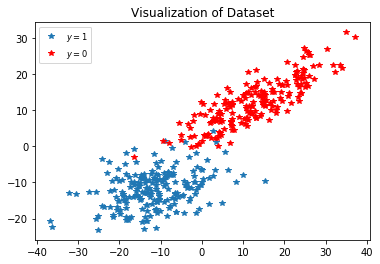

In [10]:
#数据可视化
#print(train_data[6],train_data[6].dot([0,1,0]))
def visulize_data(data,label):
    z1=data[np.where(label == 1)[0]]
    z2=data[np.where(label != 1)[0]]
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(z1[:,0], z1[:,1],'*',label = '$y = 1$')
    ax.plot(z2[:,0], z2[:,1],'r*', label = '$y = 0$')
    plt.title('Visualization of Dataset')
    ax.legend(loc = 'upper left', fontsize = 'small')

visulize_data(train_data,train_label)

In [11]:
def pla(data,label,times):
    w = np.random.randn(3)#data[0]
    print('w0=',w)
    all_correct = False
    time = 0
    error_history=[]
    while not all_correct:
        err_num = 0 #每次训练从头开始时，错判个数重置
        all_correct = True
        for i in range(data.shape[0]):
            temp = np.dot(w,data[i])
            #if temp == 0:
            #    temp == -1
            if np.sign(temp) != np.sign(label[i]):
                w += label[i]*data[i]
                all_correct = False
                err_num +=1
        error_history.append(err_num)
        if time >= times:
            break
        time+=1
    return w,error_history

In [24]:
w,error_history = pla(train_data,train_label,10)
print('w=',w)
print(error_history)

w0= [-0.89454228  0.06243399  0.80578342]
w= [ -0.15192285 -28.41218333   1.80578342]
[14, 11, 12, 11, 10, 9, 9, 11, 10, 9, 9]


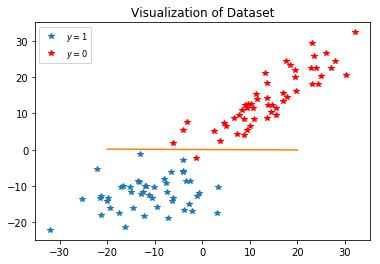

In [25]:
#test data分割
visulize_data(test_data,test_label)
y_1= -w[0]/w[1]*-20 - w[2]/w[1]
y_2= -w[0]/w[1]*20 - w[2]/w[1]
plt.plot([-20,20],[y_1,y_2])

In [46]:
pd.DataFrame(error_history,columns=['in-sample error'])

,in-sample error
0,14
1,11
2,12
3,11
4,10
5,9
6,9
7,11
8,10
9,9
